In [1]:
import numpy as np 
from qclab.algorithms.mean_field import MeanField
from qclab.models.holstein_lattice import HolsteinLatticeModel
from qclab.simulation import Simulation
from qclab.drivers.serial_driver import run_simulation


# simulation parameters 
simulation_parameters = dict(dt = 0.01, tmax = 10, num_trajs = 2, batch_size = 2)
sim = Simulation(simulation_parameters)
model_parameters = dict(N = 10, j = 1.0,w = 1.0, g = .01, periodic_boundary = True)
sim.model = HolsteinLatticeModel(model_parameters)
sim.algorithm = MeanField()


wf_db_0 = np.zeros(sim.model.parameters.N) + 0.0j
wf_db_0[0] = 1.0+0.0j
sim.state.add('wf_db', wf_db_0)

data = run_simulation(sim)


/home/akrotz/Research/pyMQC/qclab/tasks.py:320: UserWarning: h_quantum_vectorized not implemented for this model. Using non-vectorized method.
  warnings.warn("h_quantum_vectorized not implemented for this model. Using non-vectorized method.", UserWarning)
/home/akrotz/Research/pyMQC/qclab/tasks.py:321: UserWarning: h_qc_vectorized not implemented for this model. Using non-vectorized method.
  warnings.warn("h_qc_vectorized not implemented for this model. Using non-vectorized method.", UserWarning)
/home/akrotz/Research/pyMQC/qclab/tasks.py:79: UserWarning: dh_c_dzc_vectorized not implemented for this model. Using non-vectorized method.
  warnings.warn("dh_c_dzc_vectorized not implemented for this model. Using non-vectorized method.", UserWarning)
/home/akrotz/Research/pyMQC/qclab/tasks.py:139: UserWarning: dh_qc_dzc_vectorized not implemented for this model. Using non-vectorized method.
  warnings.warn("dh_qc_dzc_vectorized not implemented for this model. Using non-vectorized method."

2


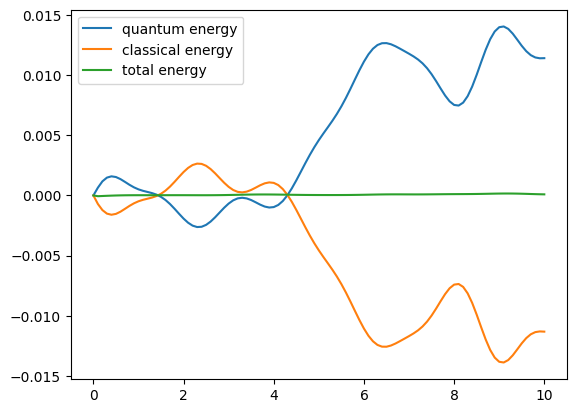

/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


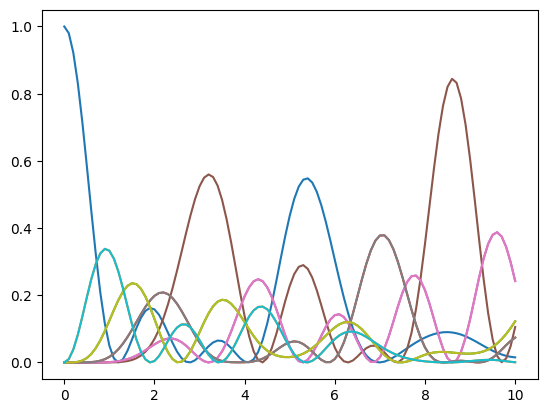

In [2]:
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = data.data_dic['quantum_energy']/ntraj
ec = data.data_dic['classical_energy']/ntraj
pops = np.einsum('tii->ti', data.data_dic['dm_db']/ntraj)

import matplotlib.pyplot as plt
plt.plot(sim.parameters.tdat_output, eq-eq[0], label='quantum energy')
plt.plot(sim.parameters.tdat_output,ec-ec[0], label='classical energy') 
plt.plot(sim.parameters.tdat_output,eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(sim.parameters.tdat_output,pops)
plt.show()

In [3]:
print(np.shape(sim.parameters.tdat))

(1001,)
